# Individual Exam CtH | Analysing "Brand Twitter"

### Author: Laura Vochita

Be sure to check the assignment description on Canvas once more.

Handing in the notebook should be done in a `zip` file, together with any files you create. We request you to name the exam submission as "exam_name_studentname.zip" with your corresponding name. The data is presented in the `data` folder. Also, include the files containing the data when handing in your exam, as this helps us to check your code when re-running it. To check if we can run your notebook from top to bottom without receiving errors, try to clear all the output of the cells and rerun everything. This can be done automatically by clicking on `Runtime --> Restart and run all`.

Good luck!

# Introduction

For this assignment we will investigate the phenomenon of "*Brand Twitter*". While corporate communication is traditionally rather bland, in recent years a trend has emerged of brands communicating on social media in a far less formal way. Social media teams of certain brands have started use memes, edgy humour and an informal and personal style of writing, sometimes also engaging with other brand accounts in a way that is similar to how many Twitter users tweet and interact with each other. This phenomenon of corporate personhood has been called *Brand Twitter*.

In 2019, Vulture published a history of the phenomenon, just in case you find it interesting: https://www.vulture.com/2019/06/brand-twitter-jokes-history.html

For this assignment we will consider a group of brand accounts that are often considered part of *Brand Twitter*:

    * @Wendys - Wendy's
    * @PrimeVideo - Amazon Prime Video
    * @MerriamWebster - Merriam Webster
    * @BurgerKing - Burger King
    * @Netflix - Netflix US
    * @McDonalds - McDonald's
    * @DennysDiner - Denny's Diner

We thought it would be interesting to analyse the tweets of these brand accounts to learn more about this novel style of corporate communication and the ways corporations might be perceived as relatable people on social media.

# Data

The data can be found within the file `brand_tweets.csv`. This file contains twitter data on tweets (every row is one tweet) by these brands.

FYI: This data was acquired from Twitter using their API if you're interested, following the method from the optional Notebook 7.

*Please note: this dataset might contain content which could be considered as offensive. It is real unfiltered data directly from Twitter.*

# Tasks

We would like to look through some recent tweets of *Brand Twitter*, and be able to understand certain characteristics of their tweets. As these Twitter accounts represent major brands, one particularly interesting aspect of this dataset is the difference between regular tweets and tweets that are replies to other tweets, which could be replies to customers or other brands.

Make your code and results as pretty as possible, and feel free to use tabs and enumeration when printing text and formatting for the visualisations. 

This assignment is about getting familiar with Pandas' methods — we suggest going through the lecture and seminar notebooks on Pandas again. You can of course use any course material in this assignment!

You are not limited to the structure of the cells below with ` # Your code here` only. Organise your code the way you think is most readible and appropriate.

If you do not fully manage to solve a question in the requested way, feel free to solve it in a different way to be able to proceed with later questions - you'll probably still get some points.

### Question 1: Pre-processing
* Add a column with a normalised version of the 'text' column. Use an appropriate tokenizer for this type of data in your normalization function. As the 'text' column contains strings, things will be easier if your normalized text column will also contain strings.

Continue to work with this normalized column in the next tasks. You're of course free to add more columns if you think you need them. 

For this question I am using mainly what we learnt in the Week 6 notebook, as we have done this specific type of exercise in class. 

In [64]:
#imports

import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
#with Pandas import the dataset and create a dataframe
file_path = '/content/brand_tweets.csv'
df_brandtweets = pd.read_csv(file_path, encoding="utf-8") #open and read file

#import the Tweet tokenizer 
from nltk.tokenize import TweetTokenizer, word_tokenize #tokenizer for Twitter

#tokenize the text
tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

#pre-process the text (as seen in notebook 6)
def filter_tweet(tokens): #define the function
    """
    Normalize a tweet's text by removing punctuation tokens and URls.
    
    Args:
        tokens (list): List of tokens from a tokenizer
        
    Returns:
        list: List of non-punctuation and URL tokens
    """
    normalized = [] #create an empty list for the normalized text 
    
    for token in tokens: #for loop which iterates over each element in the 'tokens' list
        if token in string.punctuation: #if conditional which verifies is a current character is a punctuation sign (checks if it is in the 'string.punctuation' list)
            continue #if it is, it moves onto the next character
    
        elif token.startswith(('http', 'www')): #used to filter out websites 
            continue
        else:
            normalized.append(token) #in the case in which none of the above conditions are met it adds the item to the 'normalized' list
  
    return normalized #the 'normalized' list is returned in the function

def tokenize_tweet(tweet, tokenizer=tokenizer): #define a function with 2 arguments: 'tweet' - a string which is a tweet; 'tokenizer' - a tokenizer object from a NLTK
    
    # This gives a list of tokens
    tokens = tokenizer.tokenize(tweet) #tokenizes the input string 
    filtered_tokens = filter_tweet(tokens) #using the above function for only keeping useful tokens in the analysis
    
    # This returns it back to a string
    normalized_tweet = " ".join(filtered_tokens) #join method for concatenation of the tokens
    
    return normalized_tweet #normalized string is returned 

df_brandtweets["clean_text"] = df_brandtweets["text"].apply(tokenize_tweet) #apply the tokenize_tweet function we made to a specific column in the dataframe 
df_brandtweets 




,username,user_id,tweet_id,created_at,text,in_reply_to_user,retweet_count,like_count,reply_count,quote_count,clean_text
0,Wendys,59553554,1638267643135250440,2023-03-21 19:53:38+00:00,@pure_fox3 This isn’t the service we expect. P...,9.940359e+17,0,1,0,0,@pure_fox3 This isn ’ t the service we expect ...
1,Wendys,59553554,1638267205459619841,2023-03-21 19:51:53+00:00,@violetisaghost We're disappointed to hear thi...,1.593276e+18,0,0,0,0,@violetisaghost We're disappointed to hear thi...
2,Wendys,59553554,1638188566864863233,2023-03-21 14:39:25+00:00,@Ciabatta_Boi https://t.co/XtTwZVeNcM,1.464782e+18,0,2,2,0,@Ciabatta_Boi
3,Wendys,59553554,1637955779432001538,2023-03-20 23:14:24+00:00,@Plentlyofcolin We're sorry to read this. Can ...,4.710757e+09,0,2,0,0,@Plentlyofcolin We're sorry to read this Can y...
4,Wendys,59553554,1637929081814540289,2023-03-20 21:28:19+00:00,@Quasimfk We're disappointed to hear this. Ple...,1.518750e+18,0,1,0,0,@Quasimfk We're disappointed to hear this Plea...
...,...,...,...,...,...,...,...,...,...,...,...
19910,DennysDiner,23112346,1108760630742396933,2019-03-21 16:01:48+00:00,@CoryPidhaichuk happy birthday!,1.049437e+09,0,5,0,0,@CoryPidhaichuk happy birthday
19911,DennysDiner,23112346,1108753012867153920,2019-03-21 15:31:32+00:00,@CALLme_MARS come get pancakes 🥞,3.647626e+07,0,1,1,0,@CALLme_MARS come get pancakes 🥞
19912,DennysDiner,23112346,1108750684118282240,2019-03-21 15:22:17+00:00,@badgalratii sounds like you should come to De...,4.547579e+09,0,1,1,0,@badgalratii sounds like you should come to De...
19913,DennysDiner,23112346,1108747374590087168,2019-03-21 15:09:08+00:00,@emmapeebs who is she,4.475723e+08,0,5,1,0,@emmapeebs who is she


### Question 2: Description / statistics

Provide information on: 

1. Number of tweets (per brand and in total)
2. How many of those tweets are replies (per brand and in total)
3. Most liked tweet (per brand and in total)
4. Most frequent hashtags (per brand and in total)

You can present the answers in this notebook. If you prefer, you may also write your results to a separate text file (optional).

For this exercise, I am once again using the methods learnt in class. The important observation here is that statiscs per brand are actually statistics per 'username' in our data frame. For us, the tweets are found under 'text', but for the purpose of analysis I continue to work with the normalized version of the tweets, found under 'clean_text' in my data frame. To figure out how many of them are replies, I can check how many start with '@' , as this is the format of Twitter replies. For the like count, the data frame already has a column with this name so I can easily identify the most liked tweet. For hashtags, I also searched stackoverflow and decided that the easiest way to do it is with regular expressions (for which I used the cheatsheet). 


In [66]:

#using the group method I am grouping the tweets by brand and then counting the number of tweets
tweets_per_brand = df_brandtweets.groupby('username').count()['clean_text']
#counting the number of total tweets
total_tweets = df_brandtweets['clean_text'].count()

#create a new colomn which shows if each tweet is a reply or not (using lambda as discussed in class)
df_brandtweets['reply'] = df_brandtweets['clean_text'].apply(lambda x: x.startswith('@'))
#group the dataframe by brand; with sum add up the number of tweets that are replies
replies_per_brand = df_brandtweets.groupby('username').sum()['reply']
#count the total number of replies (also with sum)
total_reply_tweets = df_brandtweets['reply'].sum()

#group by brand first, then in the colomn corresponding to the number of likes use 'idmax' to identify the max (tweet with the most likes)
most_liked_per_brand = df_brandtweets.loc[df_brandtweets.groupby('username')['like_count'].idxmax()] 
#the most liked tweet in general has the highest like count in the data frame
most_liked_tweet = df_brandtweets.loc[df_brandtweets['like_count'].idxmax()]

#extract hashtags from clean_text column using regular expressions
df_brandtweets['hashtags'] = df_brandtweets['clean_text'].apply(lambda x: re.findall(r'#(\w+)', x))
#group by brand and count the frequency of each hashtag using 'value_counts'
hashtags_per_brand = df_brandtweets.explode('hashtags').groupby('username')['hashtags'].value_counts() #explode method for converting the hashtag column (lists) into a series with separate values for counting
#find the most used hashtag per brand with grouping
most_used_hashtag_per_brand = hashtags_per_brand.groupby('username').idxmax()
#find the overall most used hashtag
most_used_hashtag = hashtags_per_brand.idxmax()


print(f"Number of tweets per brand:\n{tweets_per_brand}\n")
print(f"Total number of tweets: {total_tweets}\n")

print(f"Number of replies per brand:\n{replies_per_brand}\n")
print(f"Total number of reply tweets: {total_reply_tweets}\n")

# print the tweets for the most_liked
print("Most liked tweet per brand:\n")
#for loop to iterate over the rows in the data frame
for index, row in most_liked_per_brand.iterrows():
    print(f"{row['username']}: {row['text']}\n")
print("Most liked tweet in general:")
print(most_liked_tweet['text'])

print(f"Most used hashtag per brand:\n{most_used_hashtag_per_brand}\n")
print(f"Most used hashtag overall: {most_used_hashtag}\n")


Number of tweets per brand:
username
BurgerKing        3248
DennysDiner       3210
McDonalds         3248
MerriamWebster    3169
Netflix           1828
PrimeVideo        1966
Wendys            3246
Name: clean_text, dtype: int64

Total number of tweets: 19915

Number of replies per brand:
username
BurgerKing        3184
DennysDiner       2185
McDonalds         3245
MerriamWebster     789
Netflix            297
PrimeVideo         135
Wendys            3171
Name: reply, dtype: int64

Total number of reply tweets: 13006

Most liked tweet per brand:

BurgerKing: bk boss: did you write those tweets i asked for?

my brain: whopper whopper whopper whopper

DennysDiner: find cute baby from viral video and bring him to Denny’s … ✅ https://t.co/f6BvdfnzaB

McDonalds: i read all the comments 🫶 https://t.co/6mLhl44v1L

MerriamWebster: ONE OF THE DEFINITIONS OF 'LITERALLY' IS "IN EFFECT, VIRTUALLY—USED IN AN EXAGGERATED WAY TO EMPHASIZE A STATEMENT OR DESCRIPTION." SOME PEOPLE GET MAD IF YOU USE IT

### Question 3: Analysis - Corporate personhood

To observe to what extent the brands encourage corporate personhood, it would be interesting to see what pronouns the brands use to refer to themselves: "we" or "I". Let us define a "First Person Pronoun Ratio" - the total number of times that the word "I" is used by a brand / the total number of times the words "I" or "we" are used by a brand. This should give us a value between 0 and 1, and a higher value indicates that the brand used the word "I" relatively more often compared to the word "we". If we multiply this value by 100, it becomes a percentage.

1. For all of the 7 brands, compute their First Person Pronoun Ratio (or percentage) as defined here.
2. Choose the brand with the highest First Person Pronoun Ratio. For this brand, compute the First Person Pronoun Ratio separately for tweets that are replies and tweets that are not replies.

Briefly interpret the result (as a text block).

1. I first calculate how many times the word "I" is used in the normalized version of the tweets and then the number of times "we" is used. I am storing the information for each brand and report the results as a dictionary, where the name of the brand is the key and the ratio is the value. For looping I used this method found on stackoverflow https://stackoverflow.com/questions/60811104/pandas-series-unique-method-showing-values-looking-the-same. 

In [67]:
# create an empty dictionary 
pronoun_ratios = {}

#loop through each brand
for brand in df_brandtweets['username'].unique(): #using unique.() method instead of looping through each row and then checking if the next row is a different brand or not for efficiency

 #create a new data frame made up of only the rows under the column 'username' which match the current brand so I can count the pronoun usage for each brand
 brand_tweets = df_brandtweets[df_brandtweets['username'] == brand]
 #set the initial pronount count to 0
 i_count = 0
 we_count = 0
 
 #loop through each tweet for the current brand (using the clean_text column)
 for tweet in brand_tweets['clean_text']:
        i_count += tweet.lower().count(' i ') #counting the 'i' usage; opted for lowercasing to be able to count no matter how the pronoun was written
        we_count += tweet.lower().count(' we ') #same for 'we'
 #calculate the first person pronoun ratio for each brand 
 pronoun_ratio = i_count / we_count

 #for each brand, add the pronoun ratio to the dictionary
 pronoun_ratios[brand] = pronoun_ratio

for brand, ratio in pronoun_ratios.items():
    print(f"{brand}: {ratio}")



Wendys: 0.2967818831942789
PrimeVideo: 0.7411764705882353
MerriamWebster: 0.16853932584269662
BurgerKing: 0.0022935779816513763
Netflix: 2.090909090909091
McDonalds: 0.022965879265091863
DennysDiner: 0.22874493927125505


2. Now using the ratios calculated above, I first figure out which is the brand with the highest ratio based on the output: Netflix. For Netflix I am first separating the tweets that are replies from those that aren't. I have already done this in the previous exercise for the entire data frame. By using .startswirth() it returns Boolean values for when it starts with '@' in my case and when it doesn't. I use that symbol for the logical operator "not" here when working with Boolean values because the first time when I used "not" the code gave me an eror similar to this one for "or": https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o . Because of this, I searched what the symbol for "not" is in Python and used it instead, similarly to their fix and it worked. 

In [68]:

#under the column 'usernames' only pick the rows where the username is netflix
brand_tweets = df_brandtweets[df_brandtweets['username'] == 'Netflix']

#separate the replies and non-replies into two data frames
replies = brand_tweets[brand_tweets['reply']] #for when the Boolean value is "True"
non_replies = brand_tweets[~brand_tweets['reply']] #for when the Boolean value is "False"

#counting for tweets that are replies
i_replies = 0
we_replies = 0
for tweet in replies['clean_text']: #loop iterates over the tweets in the clean_text column
    i_replies += tweet.lower().count(' i ') #using the same method as above for counting
    we_replies += tweet.lower().count(' we ')

#counting for tweets that aren't replies    
i_non_replies = 0
we_non_replies = 0
for tweet in non_replies['clean_text']:
    i_non_replies += tweet.lower().count(' i ')
    we_non_replies += tweet.lower().count(' we ')

#calculate the first person pronoun ratios
pronoun_ratio_replies = i_replies / we_replies
pronoun_ratio_non_replies = i_non_replies / we_non_replies

# print out the results

print("First person pronoun ratio for Netflix tweets that are replies is {:.2f}".format(pronoun_ratio_replies))
print("First person pronoun ratio for Netflix tweets that are not replies is {:.2f}".format(pronoun_ratio_non_replies))


First person pronoun ratio for Netflix tweets that are replies is 4.50
First person pronoun ratio for Netflix tweets that are not replies is 1.66


Based on this statistic, I can say that Netflix as a brand engages differently when replying to other tweets. My assumption is that most of Netflix's replies are replies to its customers, so they use "I" to give off a more personal or close relation. Probably they use more "we" in tweets they post on their wall, as they are announcements, and in this case they want to refer to themselves as a company on the whole. 

### Question 4: Analysis - Brand interaction

Among the tweets that are replies, do the *Brand Twitter* brands reply to each other? (in a tweet this is done by writing @username at the beginning of the tweet)

1. Print three tweets from the dataframe in which a brand mentions one of the other brands.
2. For all of the 7 brands, find out how often they mention each of the other brands in replies. Present the result as a DataFrame.
 
Briefly interpret the result (as a text block).

I am doing two separate answers for each sub-question. For automatisation, I decided to create 2 functions. The function in 4.1. will print 3 relevant tweets. To find the mentions I am using regular expressions again. I am working with the normalized version of the tweets text when looking for the brand mentions, but I want to print the non normalized tweet so that it is readable.

In [69]:
def relevant_tweets(df: pd.DataFrame, number_tweets: int = 3) -> list[str]:
    """
    Finds the tweets in which a brand mentions another brand in the data frame.

    Args:
        df : The data frame 
        num_tweets (int): The number of tweets to return set to 3. 

    Returns:
        list[str]: A list of the tweets (as strings).
    """
    tweets_mentions = [] #initiate an empty list to store the relevant tweets
    brands = df['username'].unique() #create a list whoch stores all the unique brand names
    count = 0 #initiate a count to 0 to make sure I only print 3 relevant tweets
    #for loop to iterate over each row in the data frame
    for index, row in df.iterrows(): 
       brand = row['username'] #store the brand name extracted from the row; under the column 'username'
       tweet_normalized = row['clean_text'] #store the normalized text of the tweet extracted from each row; under the column 'clean_text'
       tweet_regular = row['text'] #store the non-normalized text of the tweet extracted from each row; under the column 'text'
       mentions = re.findall(r'@(\w+)', tweet_normalized) #store the extracted mentions from the normalized tweet

       #for loop to go through each mention
       for mention in mentions: 
         #if clause to check if the mention found is of a brand and if that brand is different than the current one
         if mention in brands and mention != brand: 
           #if clause to check if we have enough twwets in the list and to stop looping (search for new tweets)
           if count < number_tweets:
            tweets_mentions.append(tweet_regular) #add the non-normalized text of the tweet to the list which stores the relevant tweets
            count += 1  #keep count of how many tweets we have in the list
           else:
            break #break out of the loop when there are 3 relevant tweets in the list
    return tweets_mentions 

tweets_mentions = relevant_tweets(df_brandtweets, number_tweets=3) #call the function and store the return in a variable 
for tweet in tweets_mentions: #loop through each tweet in tweet_mentions
    print(tweet) #print it


@McDonalds @23XIRacing @DAYTONA @NASCAR @ToyotaRacing @BubbaWallace https://t.co/5cDuOoqDhh
@RealCryptoFire @McDonalds Maybe next time…don’t get them?
@TabRob22 @Oreo @SpiritHalloween @duolingo @SlimJim @AuntieAnnes @SEGA @SwedishFish @BurgerKing @tacobell @McDonalds @wingstop @BushsBeans Heart with "who cares" written in it and buy a Baconator. Go.


For the second part, I am building on my first function. I am repurposing the method used here to extract the mentions, but in this function I adapt it to keep count of how often this happens in the entire data frame and to also present the results as a data frame, as requested. The first function looks for mention of other brands in all tweet. This function is changed so that it specifically looks for brand mentions in tweets that are replies. Because of this I am using a nested dictionary. My dictionary has one key as one of the brands and then, inside of it there is another dictionary that has the name of the other brands as keys and as values an integer (initially 0) of how many times it appeared in the mention of the original brand (as key).  

In [70]:

def brand_mentions(df: pd.DataFrame) -> pd.DataFrame:
    """
    Counts the number of times each brand mentions another brand in their replies in the data frame.

    Args:
        df : The data frame 

    Returns:
        pd.DataFrame: A data frame of the results
    """
    brands = df['username'].unique() #create a list of all the unique brand names
    
    #initiate a dictionary to store the number of mentions for each brand
    brand_mentions = {}

    #for loop to go over each brand in the brands list
    for brand in brands:
        brand_mentions[brand] = {} #creates a nested dictionary within brand_mentions (where each brand is a key)
        for other_brand in brands: #for loop to go again over the brands
            if other_brand != brand: #each brand that is not the current brand
                brand_mentions[brand][other_brand] = 0 #key is the brand and the associated value is 0
    
    #iterate over each row in the data frame
    for index, row in df.iterrows(): 
        #same method as above
        brand = row['username'] 
        tweet_normalized = row['clean_text'] 
        is_reply = row['reply'] #a variable which stores the boolean value (if the tweet is a reply or not)
        mentioned_brands = re.findall(r'@(\w+)', tweet_normalized) #find the mentions and store them in a list

      
        #if condition to see if the tweet is a reply and has a mention in it
        if is_reply and len(mentioned_brands) > 0:
            #iterate over each mentioned brand
            for mentioned_brand in mentioned_brands:
                #if the mentioned brand is in the list of brands and is not the same as the current brand
                if mentioned_brand in brands and mentioned_brand != brand:
                    brand_mentions[brand][mentioned_brand] += 1 #increase the value (number of times they have beent mentioned together)

    #convert the dictionary to a data frame
    df_brand_mentions = pd.DataFrame.from_dict(brand_mentions)
    return df_brand_mentions

#call the function
df_brand_mentions = brand_mentions(df_brandtweets)
#print the data frame
print(df_brand_mentions)


                Wendys  PrimeVideo  MerriamWebster  BurgerKing  Netflix  \
PrimeVideo         0.0         NaN             1.0         0.0      0.0   
MerriamWebster     0.0         0.0             NaN         0.0      0.0   
BurgerKing         9.0         0.0             0.0         NaN      0.0   
Netflix            0.0         0.0             0.0         0.0      NaN   
McDonalds         19.0         0.0             0.0         1.0      0.0   
DennysDiner        1.0         0.0             0.0         0.0      0.0   
Wendys             NaN         0.0             0.0         1.0      0.0   

                McDonalds  DennysDiner  
PrimeVideo            0.0          0.0  
MerriamWebster        0.0          1.0  
BurgerKing            0.0          1.0  
Netflix               0.0          0.0  
McDonalds             NaN          0.0  
DennysDiner           0.0          NaN  
Wendys                0.0          0.0  


**Interpretation**: What really stood out to me is that McDonald's mentioned Wendy's in their replies 19 times, but Wendy's never mentioned McDonald's. This weird because I suppose McDonald's would mention Wendy's in reply to Wendy's, so I have three possible assumptions for this. Either the dataset is constructed of tweets that aren't from a thread (they are just random and not connected), or something went wrong in my code, or McDonald's typically replies to Wendy's tweets but they don't engage back. Another observation is that brands which mention each other have overlapping target audiences (at least to a certain extent) this is illustrated in McDonald's and Wendy's, BurgerKing and Wendy's, Denny's Diner and Wendy's (all food chain restaurants) but also PrimeVideo and MerriamWebster (streaming platform and dictionary). 

### Question 5: Visualization

1. Plot the number of tweets in the whole dataset per week. 
    * Interpret the graph. Can you explain the overall pattern and/or some of the fluctuations that are visible? Feel free to also make reference to the numbers you computed for Question 2 in your explanation.
    * (If needed, restrict the dataframe to an active twitter timeframe)

2. Choose one of the seven brands and plot its (Twitter) popularity over time (choose the time unit and range of your choice) by:
    * Number of retweets
    * Number of likes
  
  You can either try to plot these two metrics (retweets/likes) in the same figure, or create multiple figures.
  


1. For this plot, I firslty plotted the netire time frame but the graph wasn't very insightful, as the weeks every year were hard to read. Therefore, I decided to plot the number of tweets per week only for tweets posted in 2022. I first tried with 2023 because it was the most recent, but the data frame only included the first 12 weeks so I thought it is not very insightful to do it like that either.As we did in Week 6, I converted the created_at column to date-time and set it as the index. I then grouped the tweets by week. I opted for a bar chart for easier read of the plot. 

<ipython-input-71-152451941b23>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_tweets_by_week = df_2022.groupby(df_2022['created_at'].dt.week)['clean_text'].count()


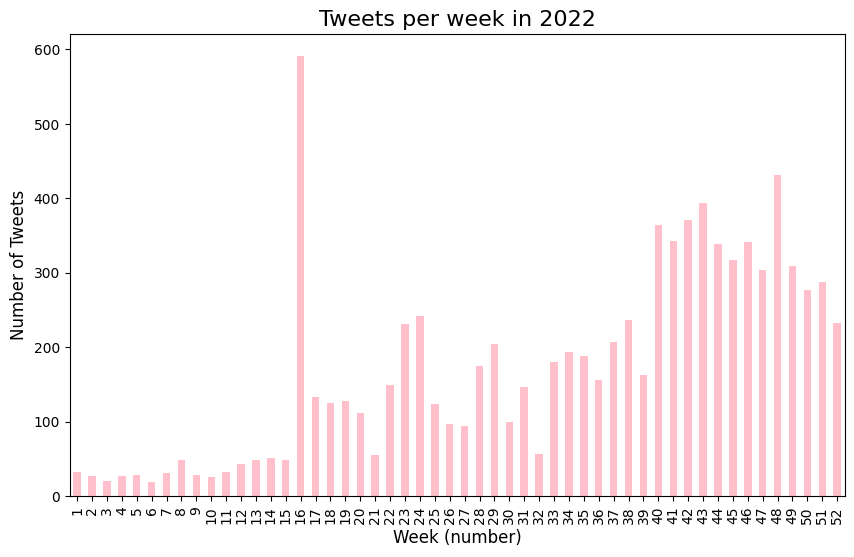

In [71]:
#convert the created_at column to datetime
df_brandtweets["created_at"] = pd.to_datetime(df_brandtweets["created_at"])

#only include the tweets created in the year 2022
df_2022 = df_brandtweets[df_brandtweets["created_at"].dt.year == 2022]

#group the tweets by week and use .count() to count how many were posted in each week
df_tweets_by_week = df_2022.groupby(df_2022['created_at'].dt.week)['clean_text'].count()

#create plot
ax = df_tweets_by_week.plot(kind='bar', figsize=(10, 6), color='pink')

#formatting the plot 
plt.title('Tweets per week in 2022', fontsize=16)
plt.xlabel('Week (number)', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

plt.show()




From the bar chart, we can see that the week with by far the largest number of tweets is Week 16. This is the calender week 18th of April to the 24th of April. As a general pattern, I can see that the brands weren't so active in the first few weeks of 2022, until a boom in week 16. After this week, they are a bit more consistent with their posting on Twitter with week 21 (23rd of May- 29th of May) and week 32 (8th of August - 14th of August) being the only ones with a significantly smaller number of tweets. I can also see an increasing trend towards the end of the year as weeks 40 to 52 (9th of October - 1st of January 2023) are consistently active. 

2. For this plot I chose to focus on Netflix since we already returned some statistics about it. I set the time frame to the year 2022 and plotted by week once again. I scaled the like adn retweet counts logarithmically because regular scaling didn't work for such large numbers. 

<ipython-input-86-c9b2237f8832>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_netflix_weekly = df_netflix.groupby(df_netflix['created_at'].dt.strftime('%U'))['retweet_count', 'like_count'].sum()


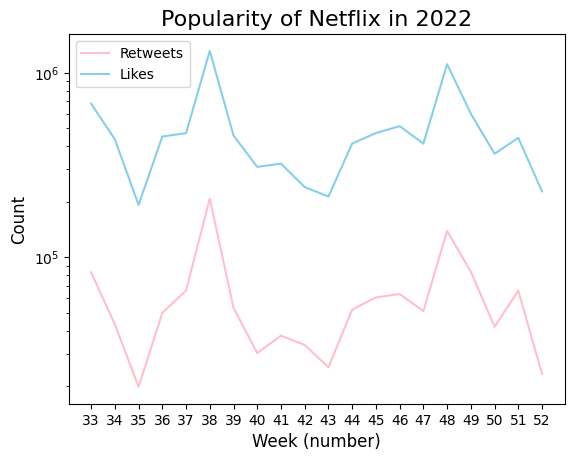

In [86]:
#convert to datetime
df_brandtweets['created_at'] = pd.to_datetime(df_brandtweets['created_at'])

#only include tweets created by Netflix in the year 2022
df_netflix = df_brandtweets[(df_brandtweets['username'] == 'Netflix') & (df_brandtweets['created_at'].dt.year == 2022)]

#group the tweets by week and sum the retweet and like counts for each week
df_netflix_weekly = df_netflix.groupby(df_netflix['created_at'].dt.strftime('%U'))['retweet_count', 'like_count'].sum()


#create plot with two lines for retweet and like counts
plt.plot(df_netflix_weekly.index, df_netflix_weekly['retweet_count'], label='Retweets', color = 'pink')
plt.plot(df_netflix_weekly.index, df_netflix_weekly['like_count'], label='Likes', color = 'skyblue')

#formatting the plot
plt.xlabel('Week (number)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Popularity of Netflix in 2022', fontsize=16)
plt.legend()
plt.yscale('log')

plt.show()







